In [235]:
import pandas as pd
import matplotlib.pyplot as plt
print('20127250 \nHo Thi Thanh Ngan')

20127250 
Ho Thi Thanh Ngan


In [236]:
df_DT1 = pd.read_csv("https://raw.githubusercontent.com/Nganho22/rvPython/main/Data_Train_p1.csv?token=GHSAT0AAAAAACJTB3H6ILWNTDLTUEOWDVDCZJ7G72A", header=0, index_col=None)
df_DT1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [237]:
df_DT2 = pd.read_csv("https://raw.githubusercontent.com/Nganho22/rvPython/main/Data_Train_p2.csv", header=0, index_col=None)
df_DT2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,15/05/2019,Delhi,Cochin,DEL → HYD → COK,06:50,16:10,9h 20m,1 stop,No info,6442
1,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,16:20,7h 55m,1 stop,In-flight meal not included,10844
2,Jet Airways,18/05/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info,5678
3,IndiGo,12/04/2019,Banglore,Delhi,BLR → DEL,23:30,02:20 13 Apr,2h 50m,non-stop,No info,6906
4,SpiceJet,21/05/2019,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,non-stop,No check-in baggage included,3543


In [238]:
#1. Đọc file dữ liệu vào pandas data frame (Data_Train_p1,Data_Train_p2)
DT1 = pd.DataFrame(df_DT1)
DT2 = pd.DataFrame(df_DT2)

In [239]:
#2. Merge hai file dữ liệu
merged_DT = pd.merge(DT1, DT2, how='outer')
print(merged_DT)

                 Airline Date_of_Journey    Source Destination  \
0                 IndiGo      24/03/2019  Banglore   New Delhi   
1              Air India       1/05/2019   Kolkata    Banglore   
2            Jet Airways       9/06/2019     Delhi      Cochin   
3                 IndiGo      12/05/2019   Kolkata    Banglore   
4                 IndiGo      01/03/2019  Banglore   New Delhi   
...                  ...             ...       ...         ...   
10619          Air India      27/03/2019     Delhi      Cochin   
10620             IndiGo      27/06/2019   Chennai     Kolkata   
10621  Multiple carriers      21/05/2019     Delhi      Cochin   
10622        Jet Airways      24/03/2019   Kolkata    Banglore   
10623        Jet Airways      24/03/2019   Kolkata    Banglore   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7

In [240]:
#3. Cho biết dữ liệu có bao nhiêu dòng?
n = merged_DT.shape[0]
print("Tong so dong du lieu la:", n)

Tong so dong du lieu la: 10624


In [241]:
#4. Có missing value ở thuộc tính nào không?
Tong_missing_values = merged_DT.isna().sum()
print("Tong gia tri bi missing o moi thuoc tinh la:")
print(Tong_missing_values)

Tong gia tri bi missing o moi thuoc tinh la:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [242]:
#5. Có duplicate dữ liệu không?
row_duplicate = merged_DT.duplicated()
Tong_row_duplicate = row_duplicate.sum()

print("cac hang bi trung lap:")
print(merged_DT[row_duplicate])
print("\nTong hang trung lap:")
print(Tong_row_duplicate)




cac hang bi trung lap:
           Airline Date_of_Journey    Source Destination  \
34     Jet Airways      15/06/2019     Delhi      Cochin   
51     Jet Airways      27/06/2019     Delhi      Cochin   
52     Jet Airways      27/06/2019     Delhi      Cochin   
77     Jet Airways      24/06/2019     Delhi      Cochin   
86     Jet Airways      24/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
8999   Jet Airways       1/06/2019     Delhi      Cochin   
9898   Jet Airways       1/06/2019     Delhi      Cochin   
9908   Jet Airways       9/05/2019     Delhi      Cochin   
9957   Jet Airways       9/06/2019     Delhi      Cochin   
10623  Jet Airways      24/03/2019   Kolkata    Banglore   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
34     DEL → NAG → BOM → COK    14:35  12:35 16 Jun      22h     2 stops   
51     DEL → AMD → BOM → COK    23:05  19:00 28 Jun  19h 55m     2 stops   
52     DEL → AMD → BOM → COK

In [243]:
#6. Kiểu dữ liệu các thuộc tính là gì
print(merged_DT.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


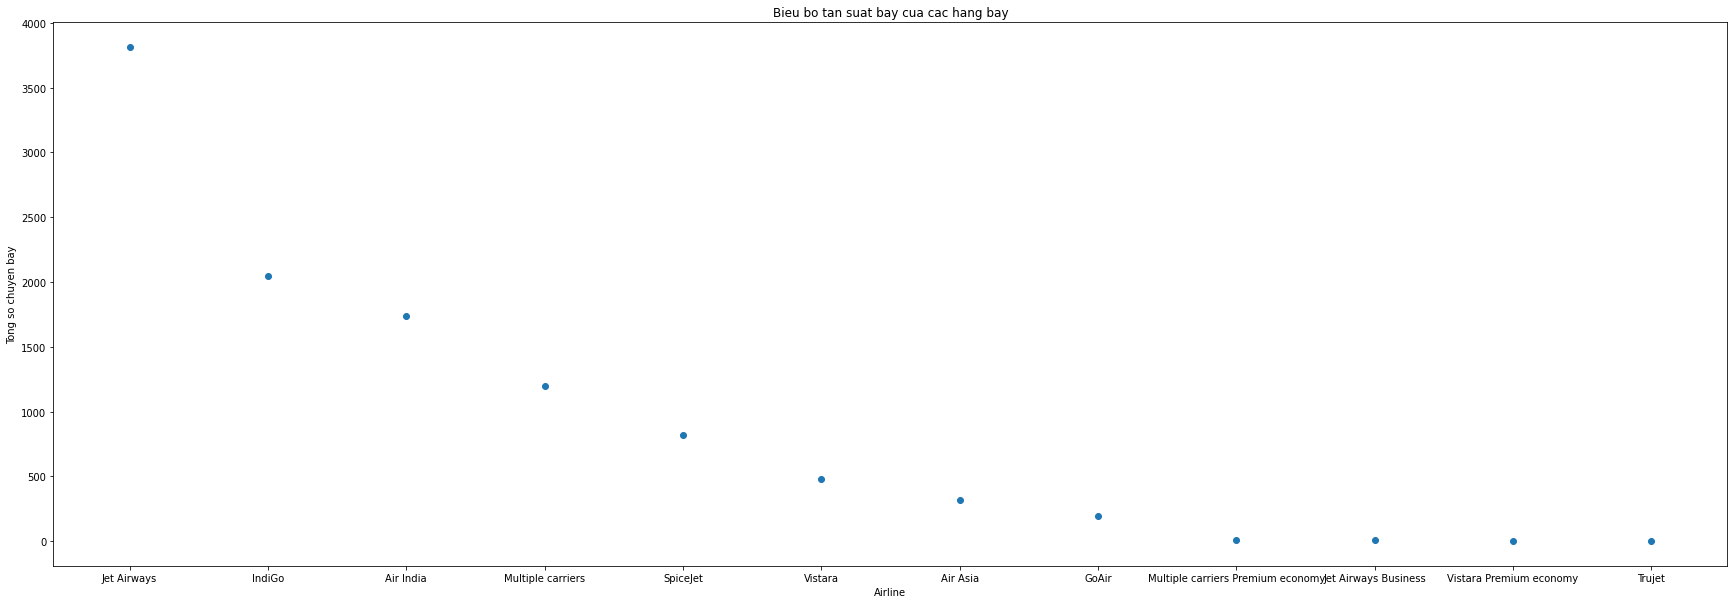

In [244]:
#7. Vẽ biểu đồ quan sát phân bố của dữ liệu
#Scatterplot
merged_DT.drop_duplicates()

Tan_suat = merged_DT['Airline'].value_counts()
plt.figure(figsize=(30,10))
plt.scatter(Tan_suat.index, Tan_suat.values)
plt.xlabel('Airline')
plt.ylabel('Tong so chuyen bay')
plt.title('Bieu bo tan suat bay cua cac hang bay')
plt.show()



Text(0.5, 1.0, 'Ti trong bay cua cac hang bay')

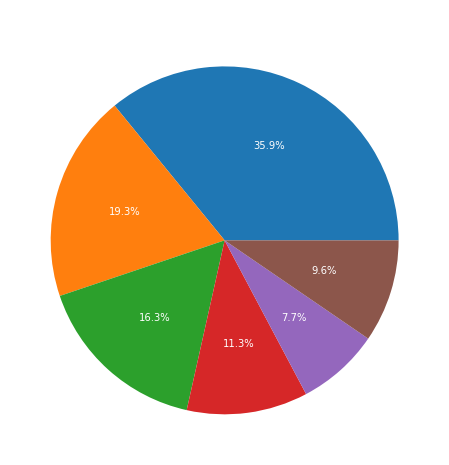

In [245]:
#pie
top_airlines = Tan_suat.nlargest(5)
other_arilines =  Tan_suat[~Tan_suat.index.isin(top_airlines.index)].sum()


top_airlines.loc['khac'] = other_arilines
text_color='white'
plt.figure(figsize=(16,8))
plt.pie(top_airlines.values, labels=top_airlines.index, autopct='%1.1f%%', shadow=False, textprops={'color': text_color})
plt.title('Ti trong bay cua cac hang bay', color='white')



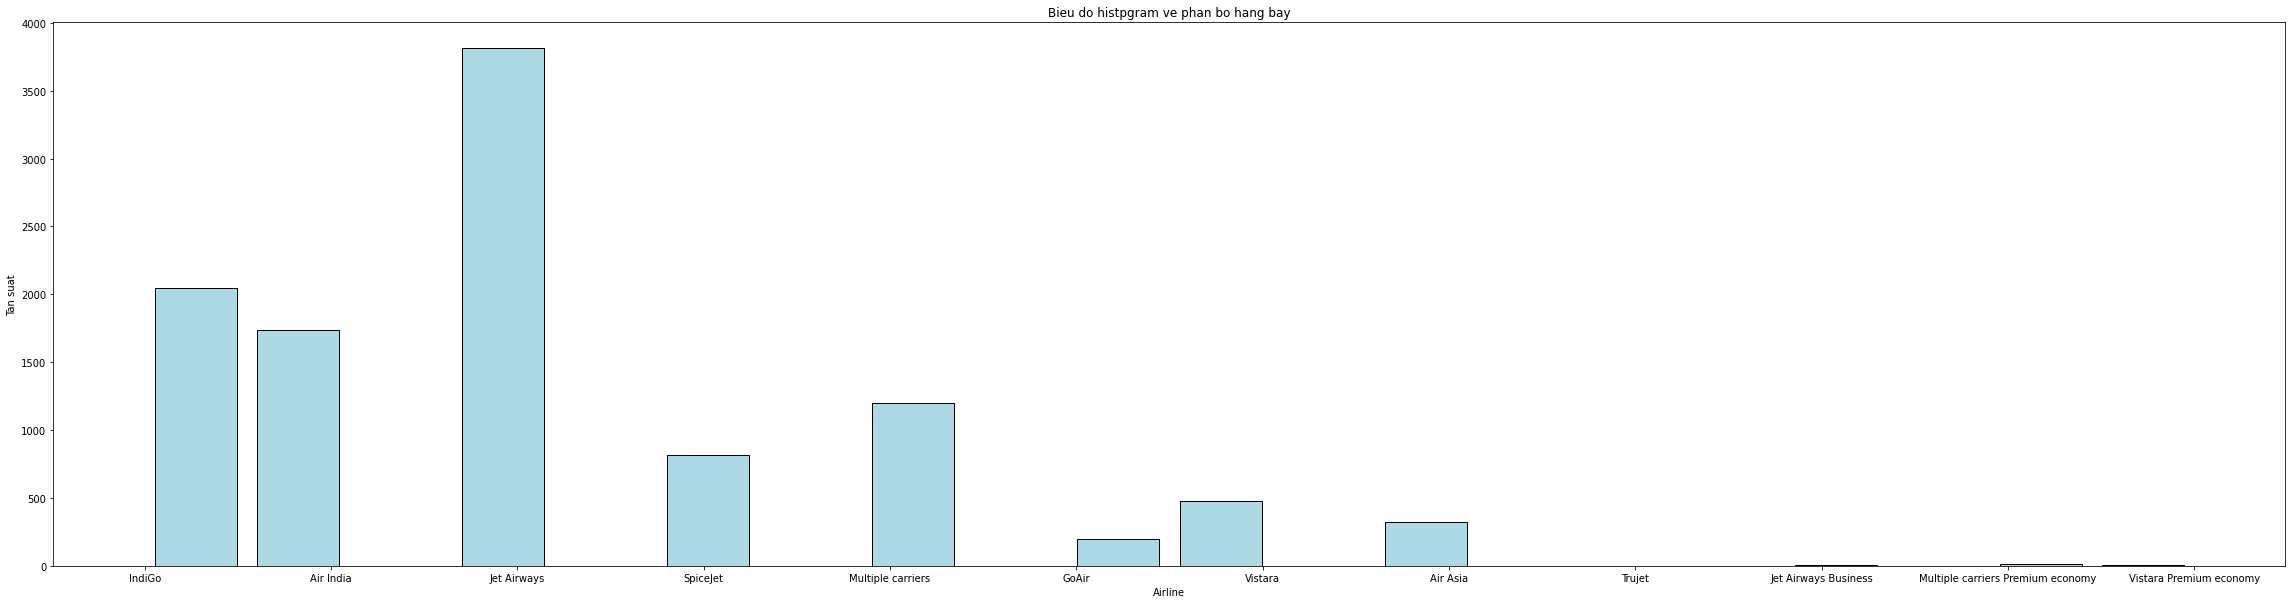

In [246]:
#Histogram
plt.figure(figsize=(40,10))
plt.hist(merged_DT['Airline'], bins=20, color='lightblue', edgecolor='black', rwidth=0.8)
plt.title('Bieu do histpgram ve phan bo hang bay')
plt.xlabel('Airline')
plt.ylabel('Tan suat')
plt.show()

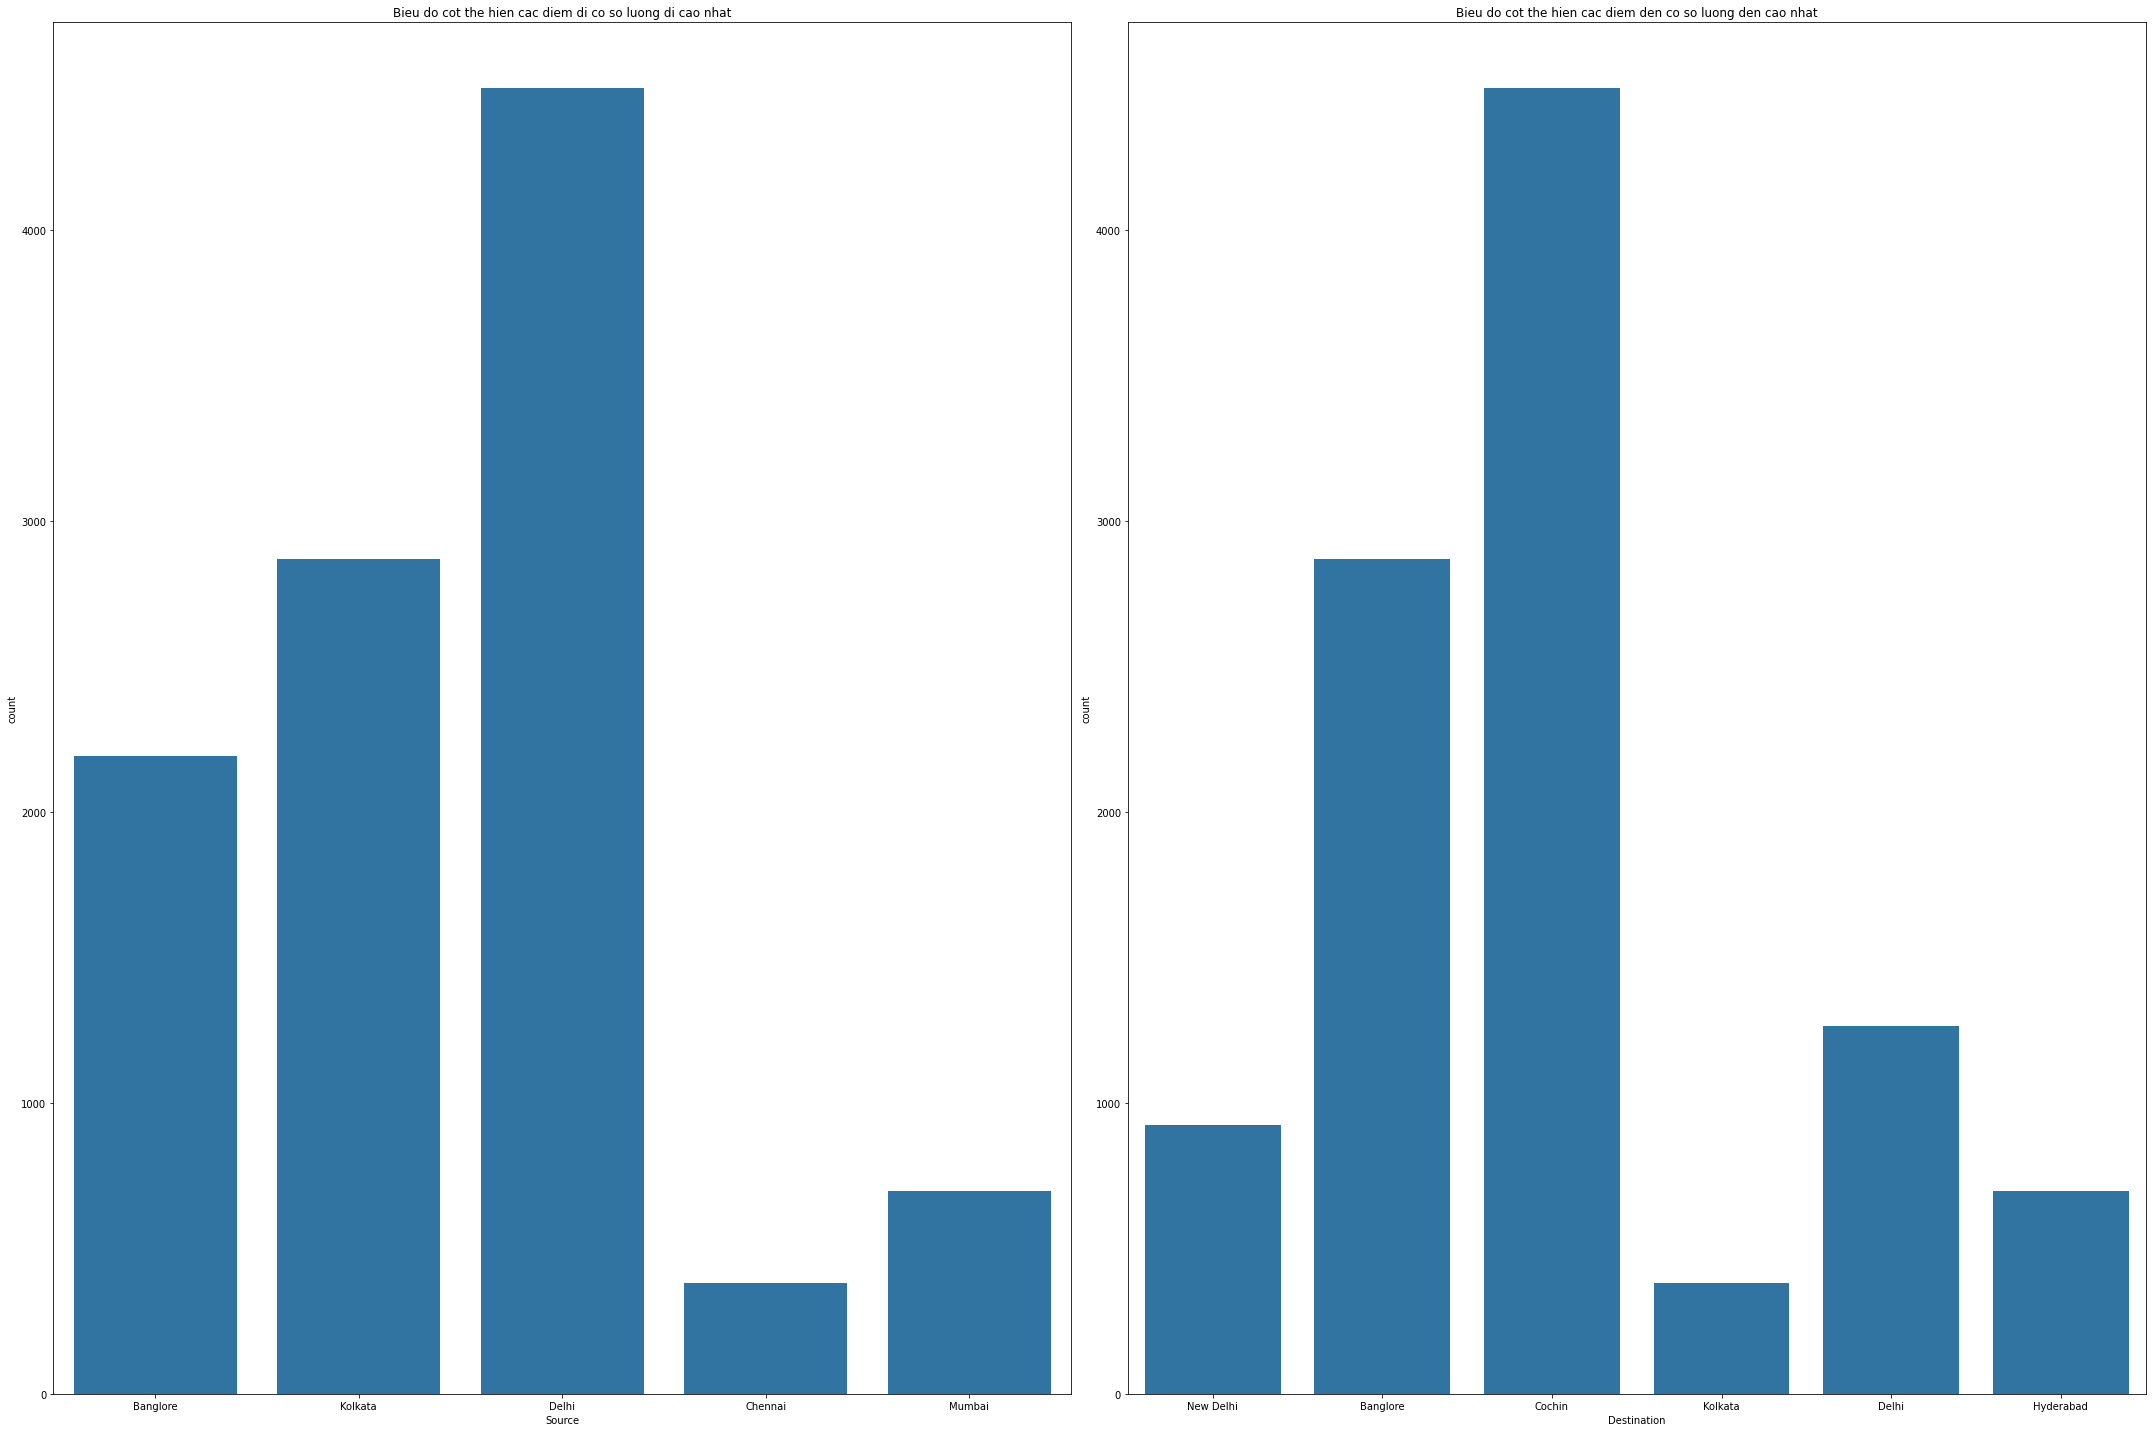

In [247]:
import seaborn as sns
plt.figure(figsize=(30, 20))


#Bar
plt.subplot(1, 2, 1)
sns.countplot(x='Source', data=merged_DT)
plt.title('Bieu do cot the hien cac diem di co so luong di cao nhat')

plt.subplot(1, 2, 2)
sns.countplot(x='Destination', data=merged_DT)
plt.title('Bieu do cot the hien cac diem den co so luong den cao nhat')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Tong Thu nhap cac hang bay')

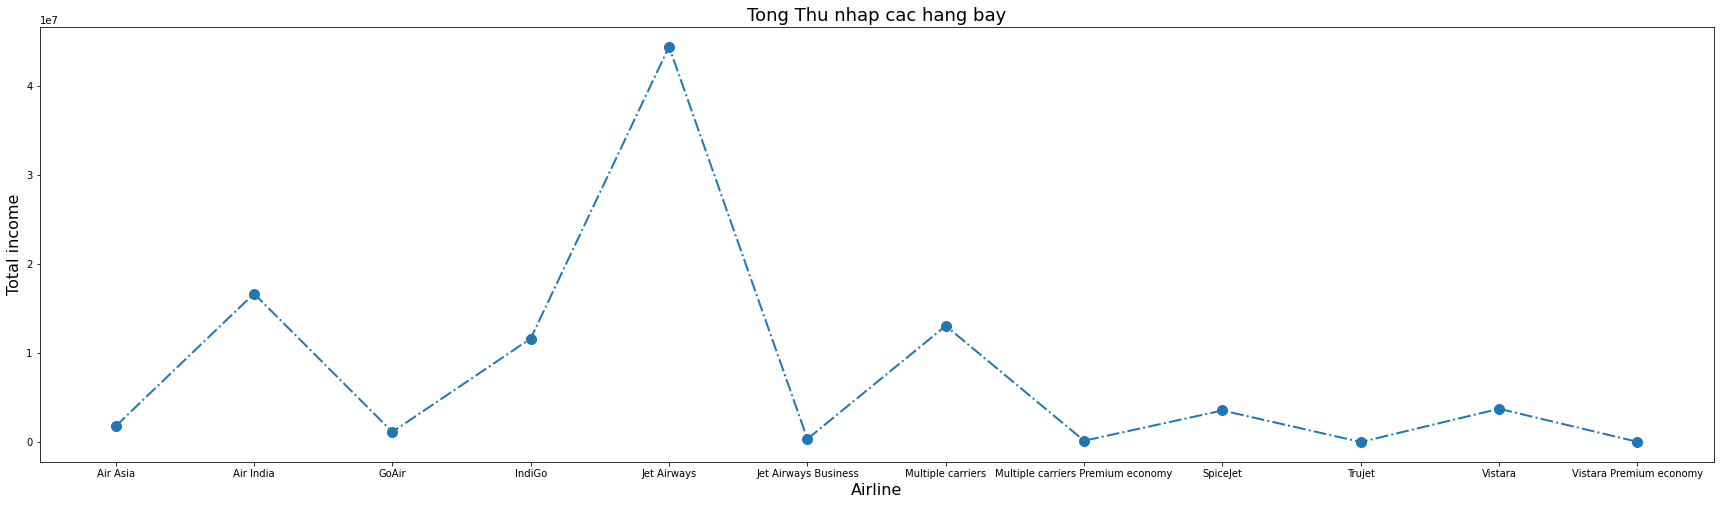

In [248]:
#Line
import numpy as np
unique_airlines_prices = merged_DT.groupby('Airline')['Price'].sum()
Plane_price = pd.DataFrame({'Airline': unique_airlines_prices.index, 'Total income': unique_airlines_prices.values})
# Vẽ biểu đồ bboxplot
plt.figure(figsize=(30,8))
plt.plot(Plane_price['Airline'], Plane_price['Total income'], marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Airline', fontsize=16)
plt.ylabel('Total income', fontsize=16)
plt.title('Tong Thu nhap cac hang bay', fontsize=18)

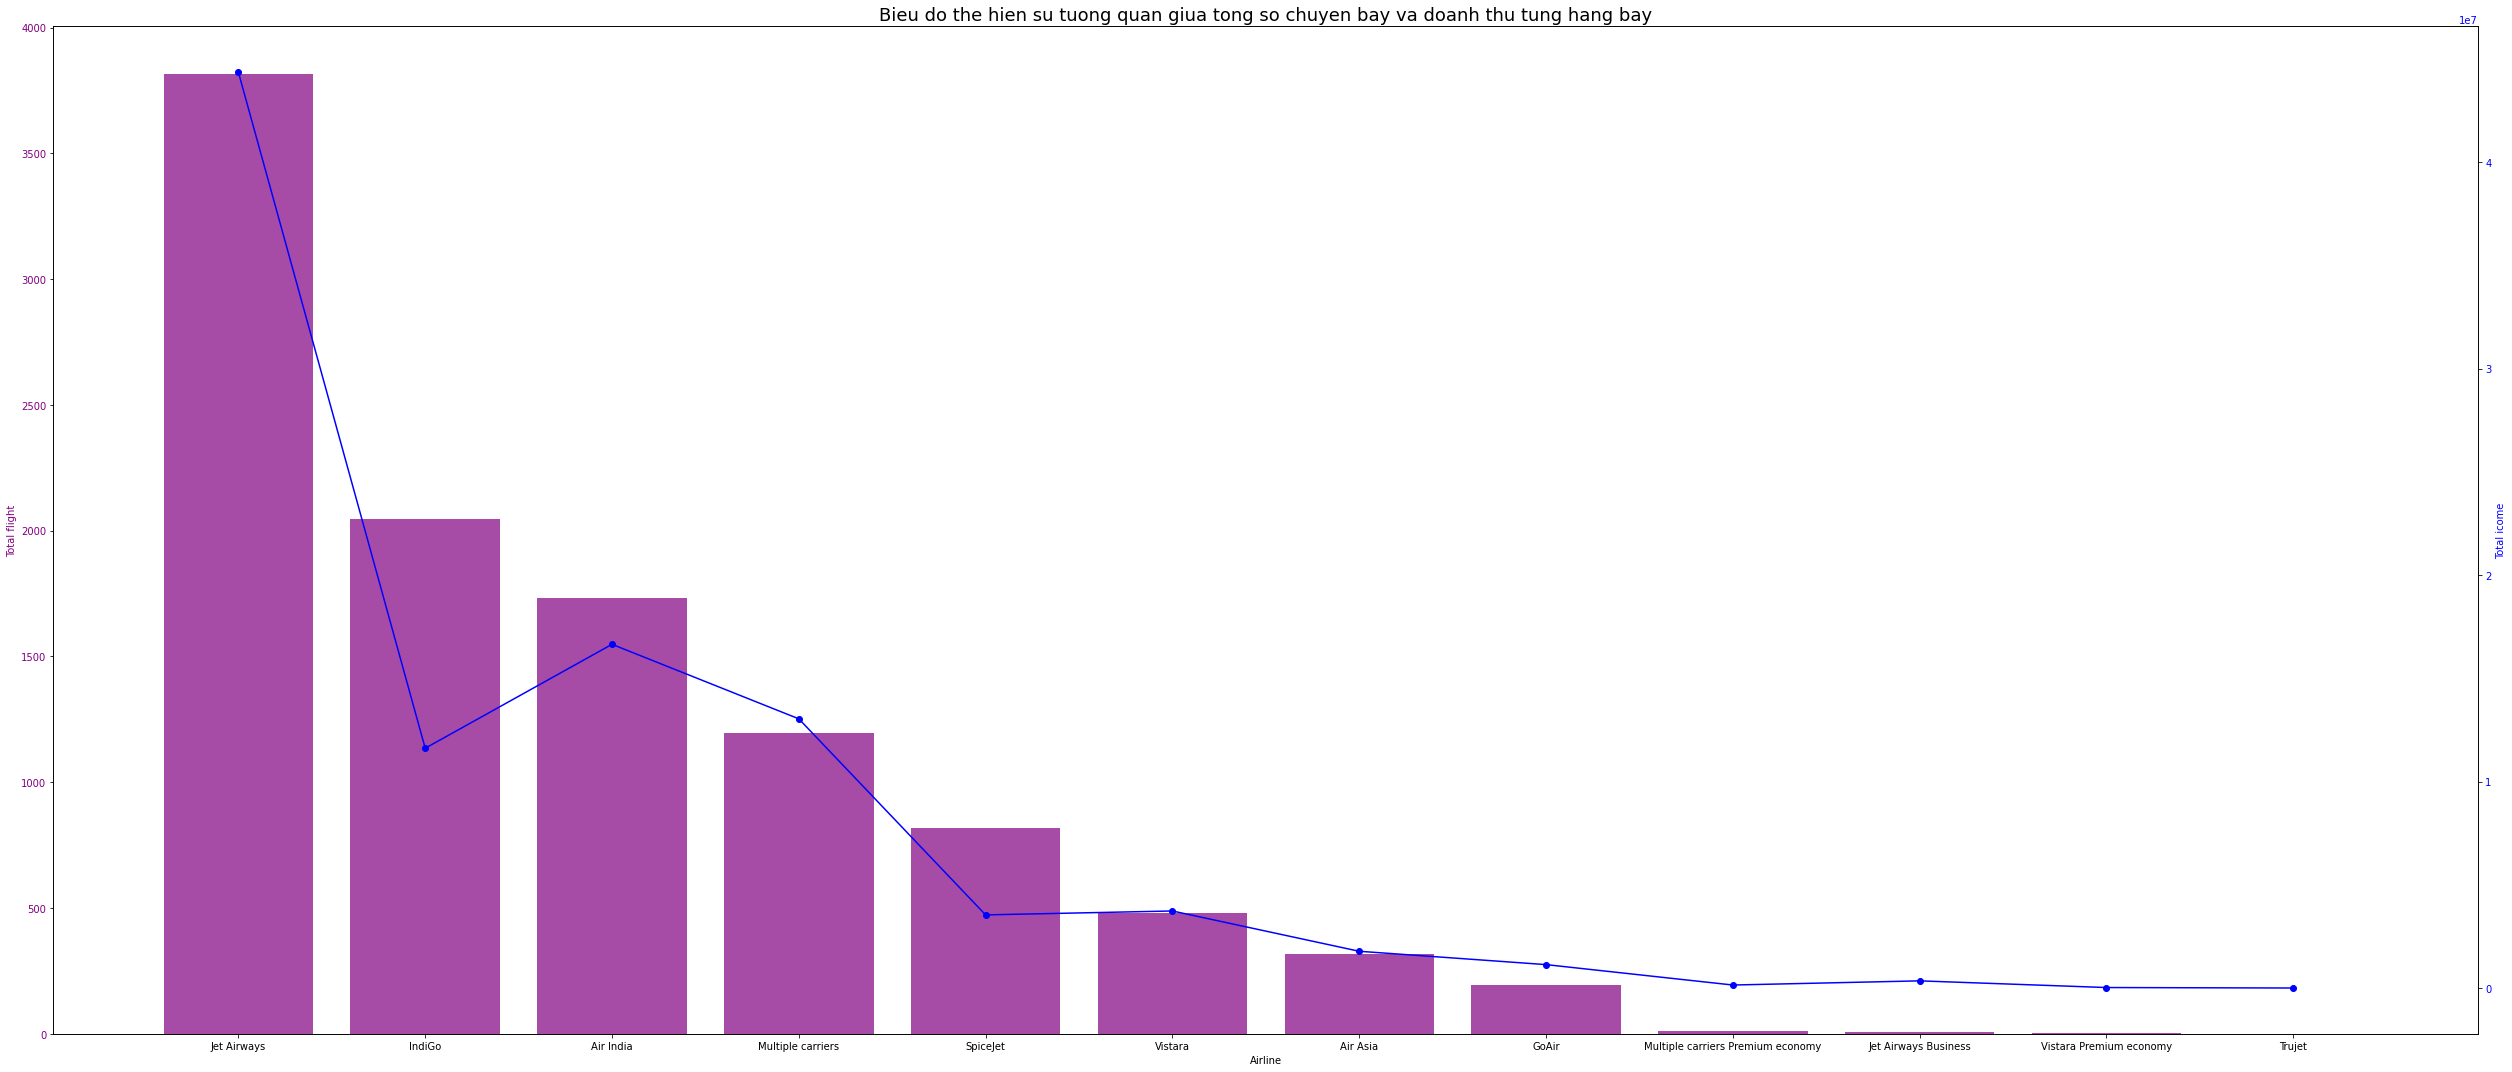

In [249]:
#Bar+Line
Plane_count = pd.DataFrame({'Airline': Tan_suat.index, 'Total flight': Tan_suat.values})

Air = pd.merge(Plane_count, Plane_price, on='Airline')
fig, ax1 = plt.subplots(figsize=(35,15))

ax1.bar(Air['Airline'], Air['Total flight'], color='purple', alpha=0.7, label='Total Flight')
ax1.set_xlabel('Airline')
ax1.set_ylabel('Total flight', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.plot(Air['Airline'], Air['Total income'], color='blue', marker='o', label='Total income')
ax2.set_ylabel('Total icome', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Bieu do the hien su tuong quan giua tong so chuyen bay va doanh thu tung hang bay', fontsize=18)
fig.tight_layout()
plt.show()

